In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch 
import glob 
import os 
import re 
import torch
import math
from nnsight import CONFIG
from nnsight import LanguageModel
import nnsight
import numpy as np
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
import random
from collections import defaultdict
import yaml 
import pickle

# Save object to a file
def save_pickle(obj, filepath):
    with open(filepath, 'wb') as f:
        pickle.dump(obj, f)

# Load object from a file
def load_pickle(filepath):
    with open(filepath, 'rb') as f:
        return pickle.load(f)


c:\Users\durrc\OneDrive\Desktop\mech_interp_work\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [50]:
cur_ws = load_pickle("numpy_sweep_results.pkl")

In [51]:
len(cur_ws["What is the square root of 36?"])

21

In [52]:
for k in cur_ws:
    cur_ws[k].sort()

Let's look at each key

In [10]:
# choose a model 
llama_model_string = "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"
# remote = use NDIF
remote = True 

# load a model
llama = LanguageModel(llama_model_string)

In [53]:
cur_ws

{'What is the square root of 36?': [(-1.0,
   array([128000, 128011,   3923,    374,    279,   9518,   3789,    315,
             220,   1927,     30, 128012, 128013,    198,  33413,     11,
             779,    358,   1205,    311,   7216,    704,   1148,    279,
            9518,   3789,    315,    220,   1927,    374,     13,  89290,
              11,    358,   6227,    430,    264,   9518,   3789,    374,
            2555,    430,    358,    649,   7344,   1005,    264,   1749,
             311,  11294,    433,     13,   6914,    757,   1781,    922,
            1268,    358,   9687,    430,    304,   2978,     13,    358,
            1781,   1070,    574,    264,   1749,   2663,   2555, 128001]),
   '<｜begin▁of▁sentence｜><｜User｜>What is the square root of 36?<｜Assistant｜><think>\nOkay, so I need to figure out what the square root of 36 is. Hmm, I remember that a square root is something that I can maybe use a method to calculate it. Let me think about how I learned that in school.

In [57]:
for k in cur_ws:
    if cur_ws[k]:
        for scale, _, sentence in cur_ws[k]:
            print(f"scale: {scale} ", sentence)
            print("\n~\n")
        print("---")

        print("\n\n\n\n\n")

scale: -1.0  <｜begin▁of▁sentence｜><｜User｜>What is the square root of 36?<｜Assistant｜><think>
Okay, so I need to figure out what the square root of 36 is. Hmm, I remember that a square root is something that I can maybe use a method to calculate it. Let me think about how I learned that in school. I think there was a method called something<｜end▁of▁sentence｜>

~

scale: -0.8005540166204986  <｜begin▁of▁sentence｜><｜User｜>What is the square root of 36?<｜Assistant｜><think>
Okay, so I need to figure out what the square root of 36 is. Hmm, let me think about this. I remember that a square root is a number that when you multiply it by itself, it gives me back the original number, which in this case is 36. So, if I call the square root of 36 as let's say 'x', then I can write that equation as x times x equals 36. That makes sense because that's the definition I learned in math class.

Now, I need to find out what number I can plug into that equation that will make that equation true. So, maybe 

Probability of first few tokens being of the form "solution"

In [69]:
ends_without_stop_think_intensity = []
all_intensity = []

for k in cur_ws:
    if cur_ws[k]:
        for intensity, tokens, sentence in cur_ws[k]:
            if (128014 not in tokens) and (128001 in tokens):
                ends_without_stop_think_intensity.append(intensity)
            all_intensity.append(intensity)

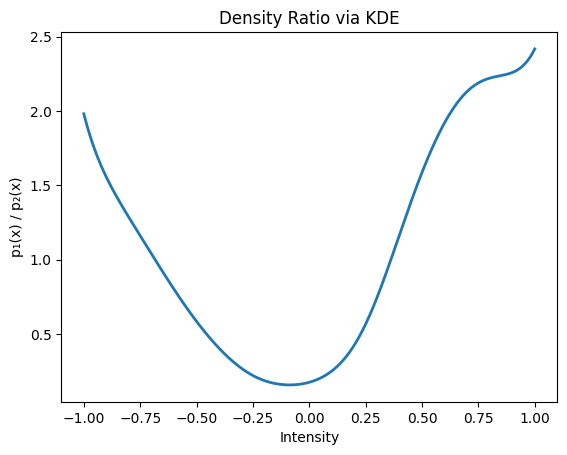

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# your data arrays
xs1 = np.array(ends_without_stop_think_intensity)   # sampled from p1
xs2 = np.array(all_intensity)                       # sampled from p2

# compute overall range
xmin = min(xs1.min(), xs2.min())
xmax = max(xs1.max(), xs2.max())

# fit KDEs
kde1 = gaussian_kde(xs1)
kde2 = gaussian_kde(xs2)

# evaluation grid (you can tweak 1000 for resolution)
x_grid = np.linspace(xmin, xmax, 1000)

# ratio with a small epsilon to avoid divide‐by‐zero
eps = 1e-12
ratio = kde1(x_grid) / (kde2(x_grid) + eps)

# plot
plt.plot(x_grid, ratio, lw=2)
plt.xlabel('Intensity')
plt.ylabel('p₁(x) / p₂(x)')
plt.title('Density Ratio via KDE')
plt.show()


In [67]:
llama.tokenizer.encode("</think>")

[128000, 128014]

In [61]:
cur_ws["If 7 notebooks cost $17.50, how much do 10 notebooks cost?"][-3]

(0.6232686980609415,
 array([128000, 128011,   2746,    220,     22,  79631,   2853,    400,
          1114,     13,   1135,     11,   1268,   1790,    656,    220,
           605,  79631,   2853,     30, 128012, 128013,    198,    334,
         37942,     25,   1035,   1271,   8417,    279,   2853,    315,
           220,    605,  79631,     11,   1833,   1521,   7504,   1473,
            16,     13,   3146,  29401,   1463,    279,   2853,    824,
         38266,     25,   1035,    256,   1144,   9837,    256,   1144,
          1342,     90,  15289,    824,  38266,     92,    284,   1144,
         38118,     90,   1114,     13,   1135,  15523,     22,     92,
           284,    220,     17,     13,   1135,    198,     59,   2595,
            17,     13,   3146,  48966,    279,   2853,    369,    220,
           605,  79631,     25,   1035,    256,   1144,   9837,    256,
          1144,   1342,     90,   7749,   2853,     92,    284,    220,
           605,   1144,  15487,    220,    

In [65]:
cur_ws["If 7 notebooks cost $17.50, how much do 10 notebooks cost?"][-3]

(0.6232686980609415,
 array([128000, 128011,   2746,    220,     22,  79631,   2853,    400,
          1114,     13,   1135,     11,   1268,   1790,    656,    220,
           605,  79631,   2853,     30, 128012, 128013,    198,    334,
         37942,     25,   1035,   1271,   8417,    279,   2853,    315,
           220,    605,  79631,     11,   1833,   1521,   7504,   1473,
            16,     13,   3146,  29401,   1463,    279,   2853,    824,
         38266,     25,   1035,    256,   1144,   9837,    256,   1144,
          1342,     90,  15289,    824,  38266,     92,    284,   1144,
         38118,     90,   1114,     13,   1135,  15523,     22,     92,
           284,    220,     17,     13,   1135,    198,     59,   2595,
            17,     13,   3146,  48966,    279,   2853,    369,    220,
           605,  79631,     25,   1035,    256,   1144,   9837,    256,
          1144,   1342,     90,   7749,   2853,     92,    284,    220,
           605,   1144,  15487,    220,    

In [13]:
_

array([128000, 128011,   2746,    279,  11595,    315,  12884,    311,
         2911,    520,    264,   4717,    374,    220,     20,     25,
           18,    323,   1070,    527,    220,   1272,   1274,   2860,
           11,   1268,   1690,   2911,    527,   1070,     30, 128012,
       128013,    198,   5451,     11,    358,  15641,    430,    279,
        11595,    315,  12884,    311,   2911,    520,    279,   4717,
          374,    220,     20,     25,     18,     13,   1115,   3445,
          369,   1475,    220,     20,  12884,     11,   1070,    527,
          220,     18,   2911,    382,   5971,     11,    358,   1440,
          279,   2860,   1396,    315,   1274,    520,    279,   4717,
          374,    220,   1272,     13,   2057,   1505,    279,   1396,
          315,  12884,    323,   2911,     11,    358,    649,   3237,
          279,   2860,   1396,    304,   3878,    315,    279,  11595,
          382,  10267,  18240,    865,   1144,      8,    387,    279,
      

In [ ]:
# let's examine how long we reason for 

scales_think_region_dist = {k:[] for k in cur_ws}

for k in cur_ws:

    for scale, tokens, sentence in cur_ws[k]:
        thinks_idxs = [i for i, v in enumerate(tokens) if v == 128013]
        stop_thinks_idxs = [i for i, v in enumerate(tokens) if v == 128014]
        eos_indices = [i for i, v in enumerate(tokens) if v == 128001]

        if len(thinks_idxs)==1 and len(stop_thinks_idxs)==1:
            scales_think_region_dist[k].append(
                (scale, ((stop_thinks_idxs[0] - thinks_idxs[0]), -1, -1))
            )
        elif len(thinks_idxs)==1 and len(stop_thinks_idxs)==0 and len(eos_indices)==0:
            scales_think_region_dist[k].append(
                (scale, (-1, len(tokens)-thinks_idxs[0]-1, -1))
            )
        elif len(thinks_idxs)==1 and len(stop_thinks_idxs)==0 and len(eos_indices)==1:
            scales_think_region_dist[k].append(
                (scale, (-1, -1, len(tokens)-thinks_idxs[0]-1))
            )
        
        else:
            assert False
        
        


In [42]:
scales_think_region_dist

{'What is the square root of 36?': [(-1.0, (-1, -1, 59)),
  (-0.8005540166204986, (-1, 301, -1)),
  (-0.6232686980609419, (-1, 301, -1)),
  (-0.46814404432132967, (-1, 301, -1)),
  (-0.33518005540166207, (-1, 301, -1)),
  (-0.22437673130193908, (-1, 301, -1)),
  (-0.1357340720221607, (74, -1, -1)),
  (-0.06925207756232689, (71, -1, -1)),
  (-0.02493074792243769, (60, -1, -1)),
  (-0.0027700831024930804, (60, -1, -1)),
  (0, (60, -1, -1)),
  (0.0027700831024930687, (60, -1, -1)),
  (0.02493074792243769, (60, -1, -1)),
  (0.06925207756232683, (96, -1, -1)),
  (0.13573407202216053, (59, -1, -1)),
  (0.22437673130193897, (59, -1, -1)),
  (0.33518005540166207, (49, -1, -1)),
  (0.4681440443213295, (51, -1, -1)),
  (0.6232686980609415, (-1, -1, 24)),
  (0.8005540166204984, (-1, 301, -1)),
  (1.0, (-1, 301, -1))],
 "What integer's square root is closest to 10.3?": [(-1.0, (-1, -1, 64)),
  (-0.8005540166204986, (-1, 301, -1)),
  (-0.6232686980609419, (-1, 301, -1)),
  (-0.46814404432132967, (-

In [39]:
[x[0] for x in scales_think_region_dist if x[1][1]>0]

[]

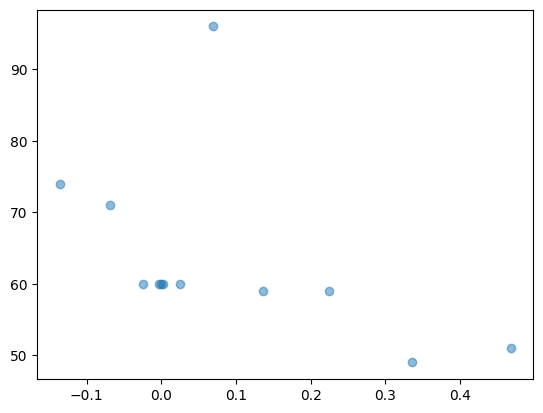

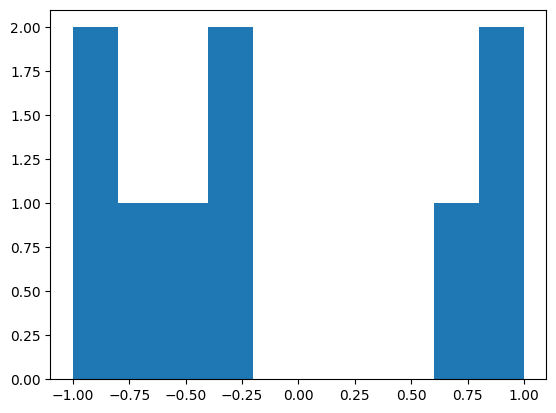

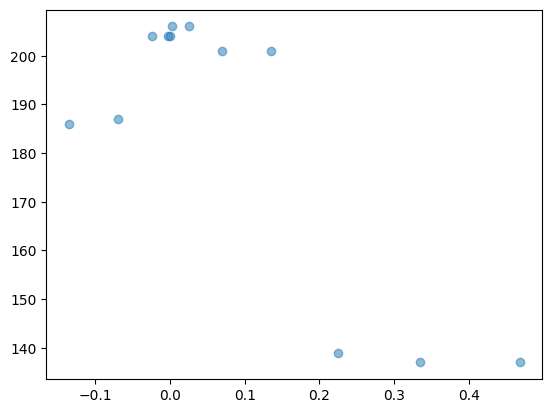

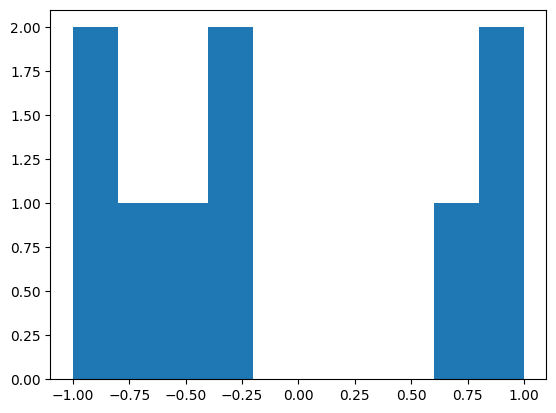

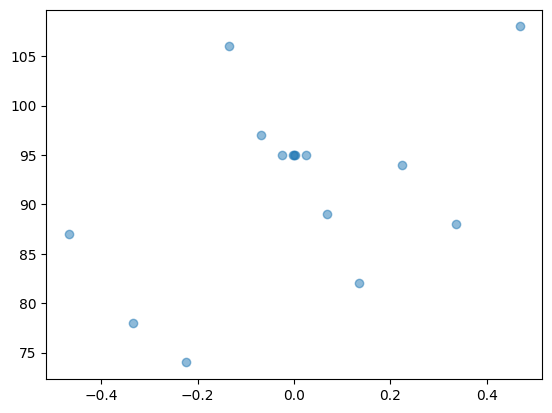

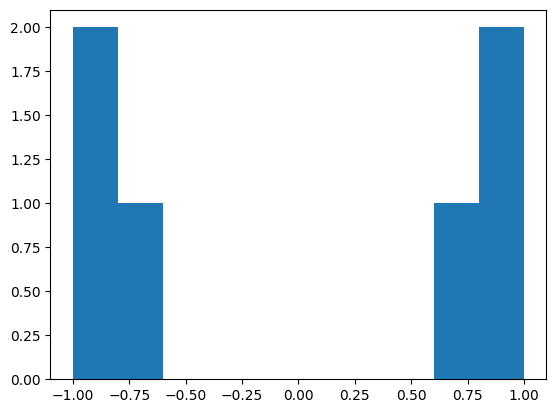

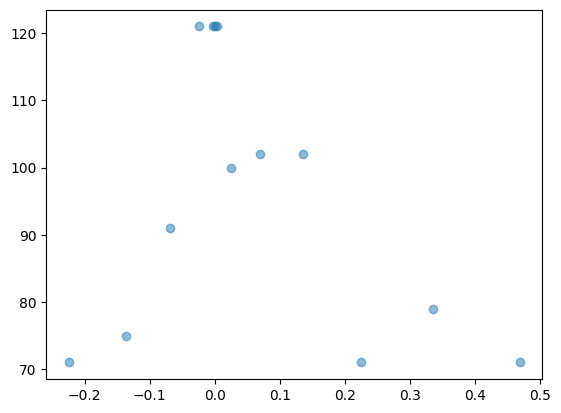

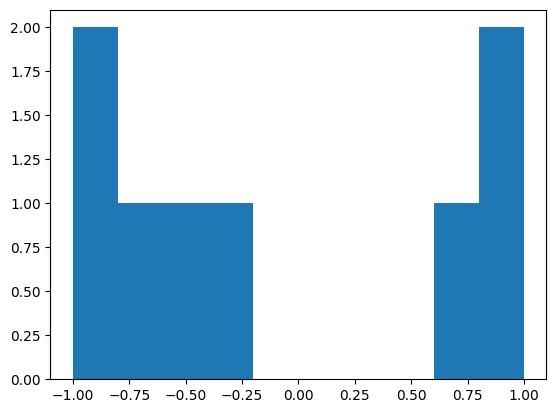

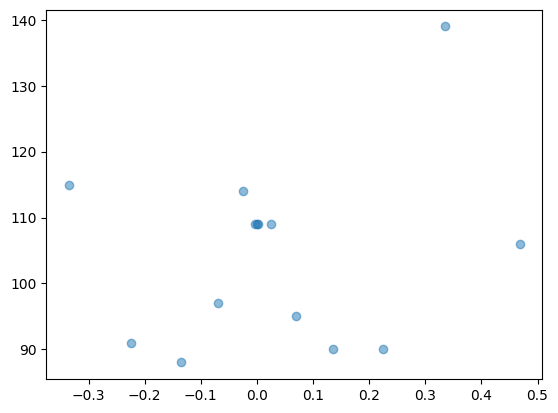

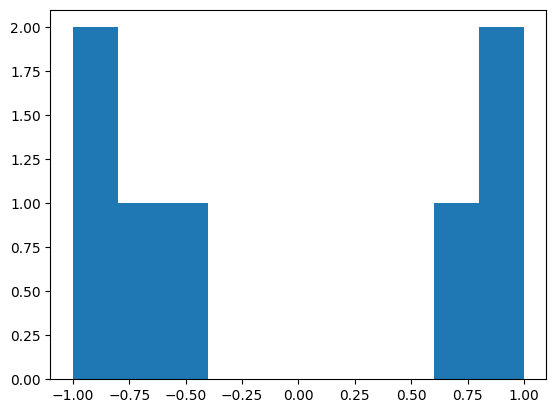

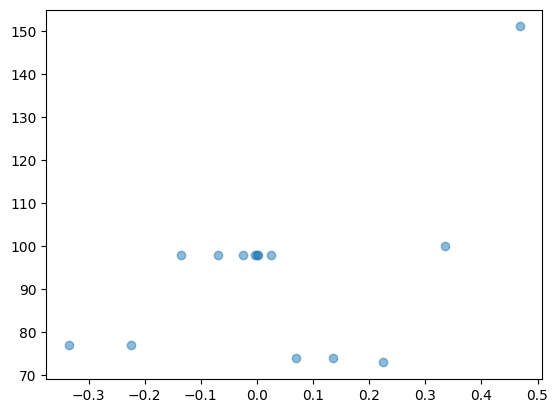

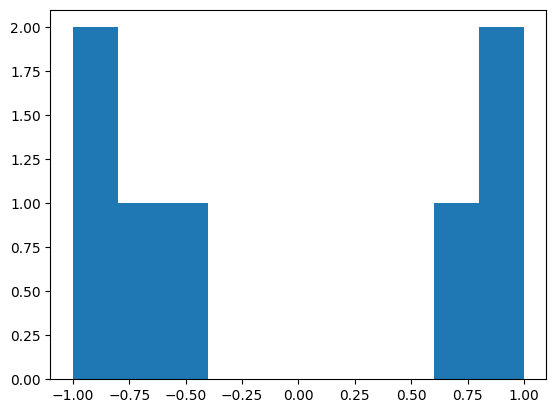

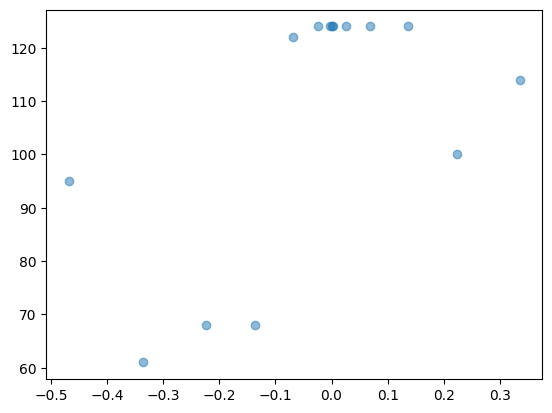

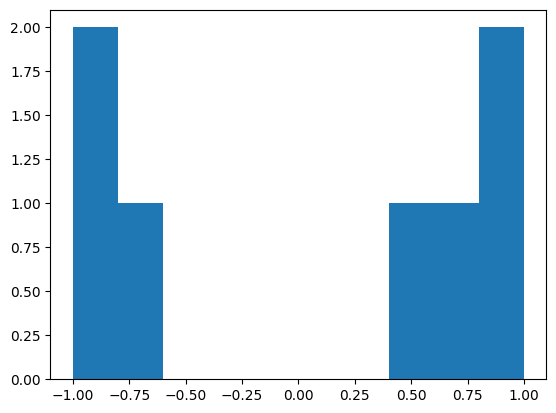

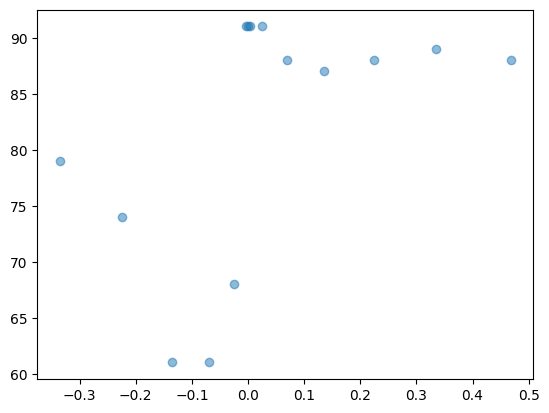

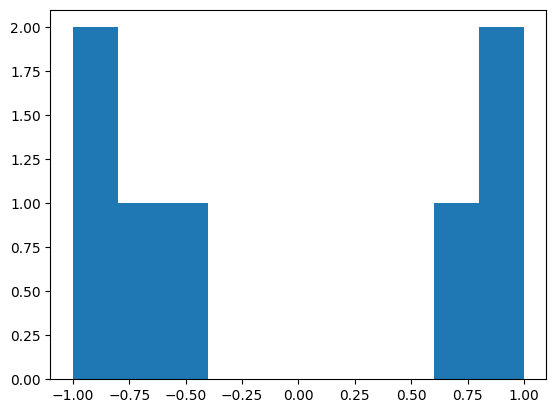

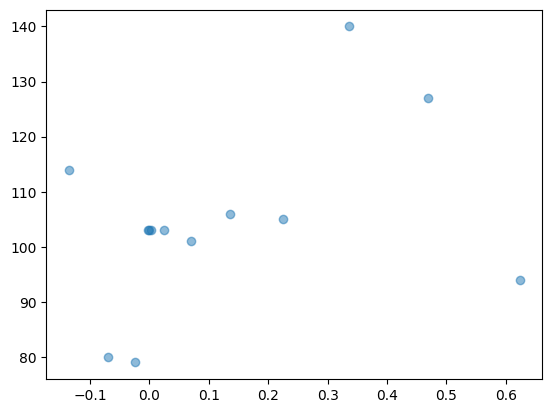

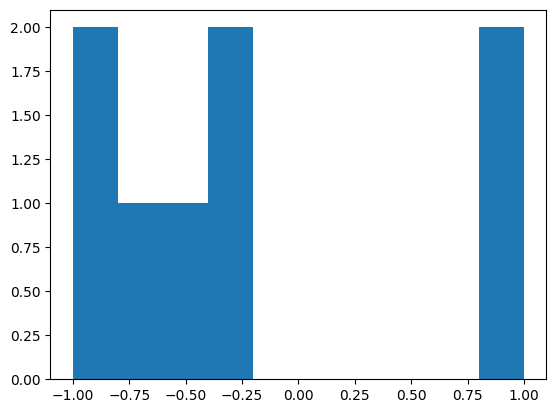

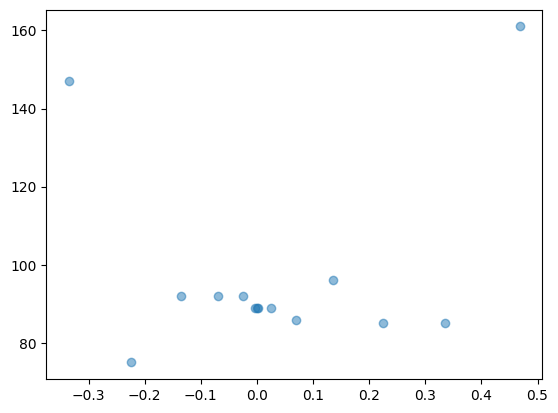

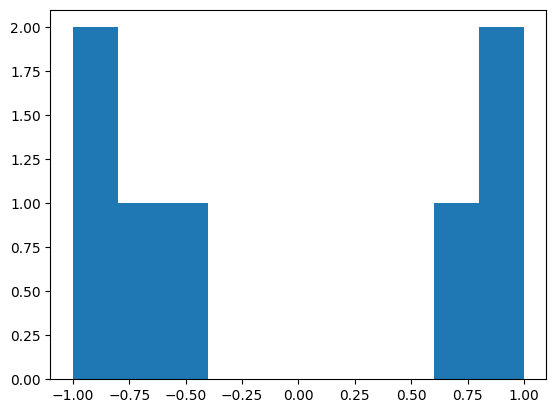

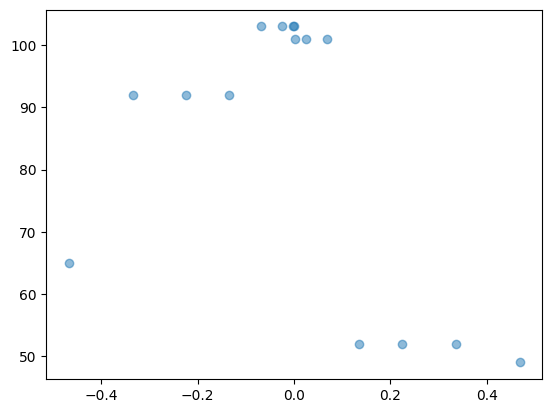

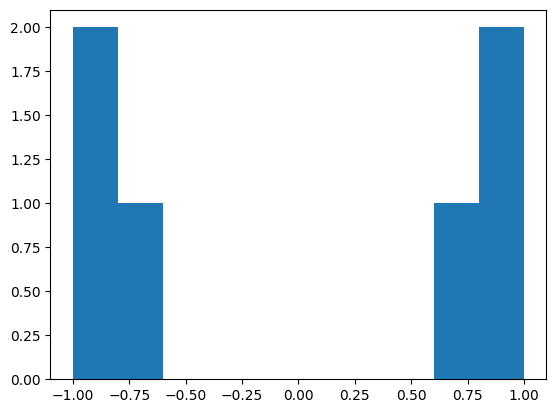

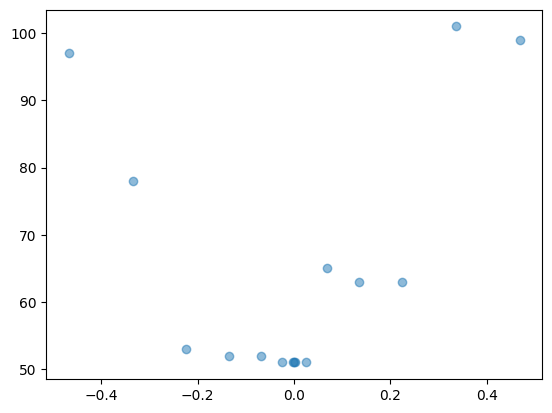

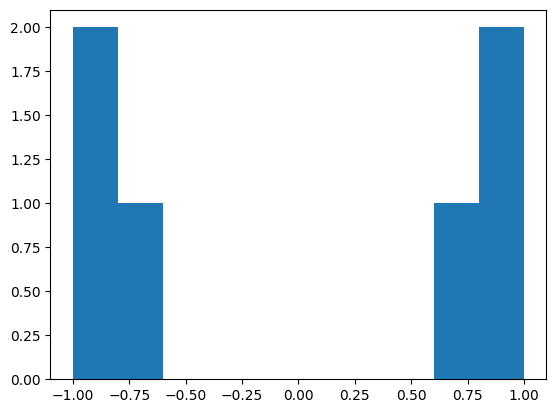

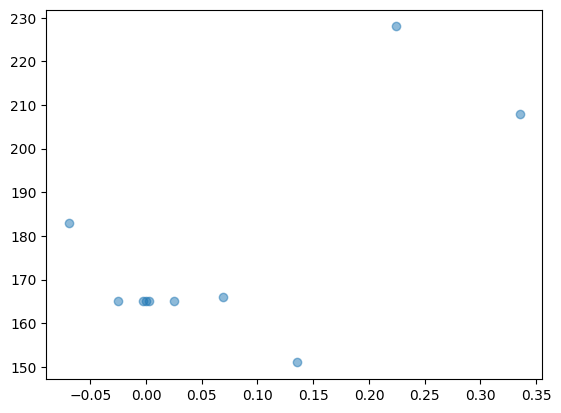

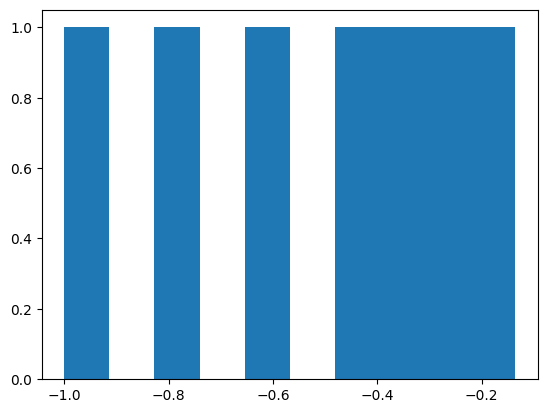

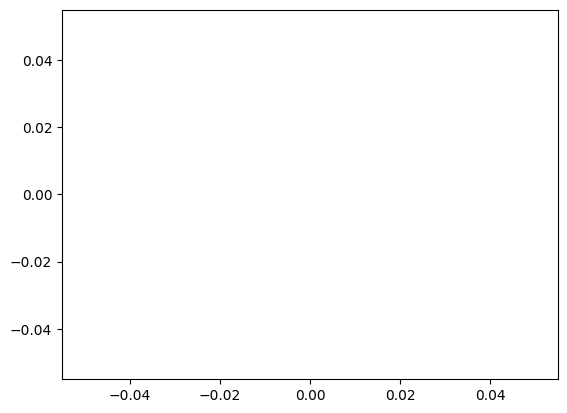

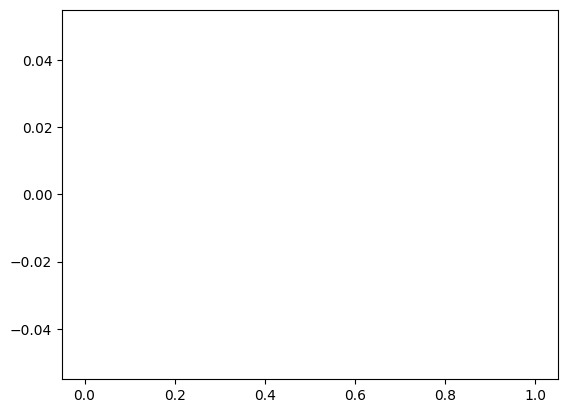

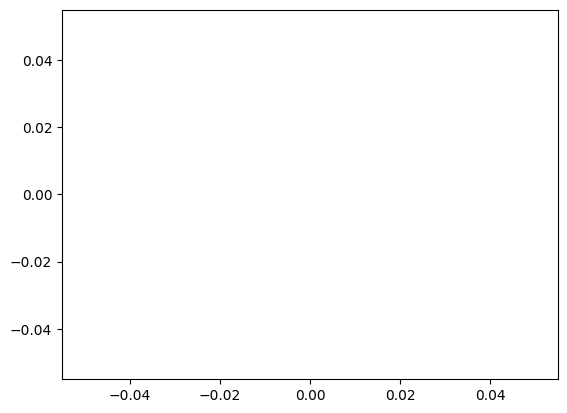

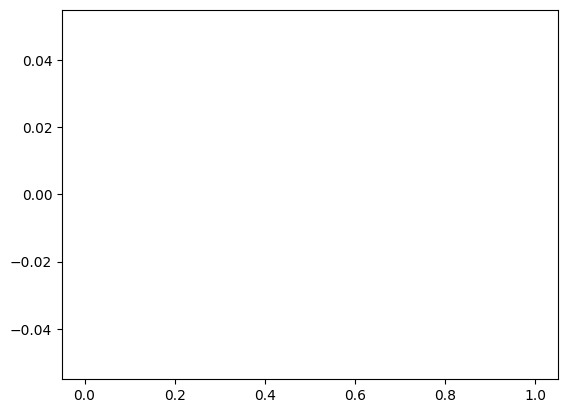

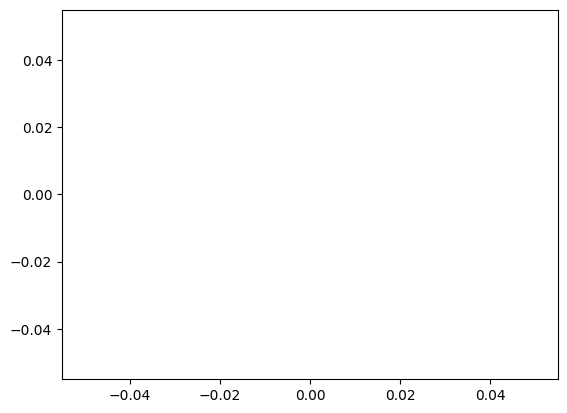

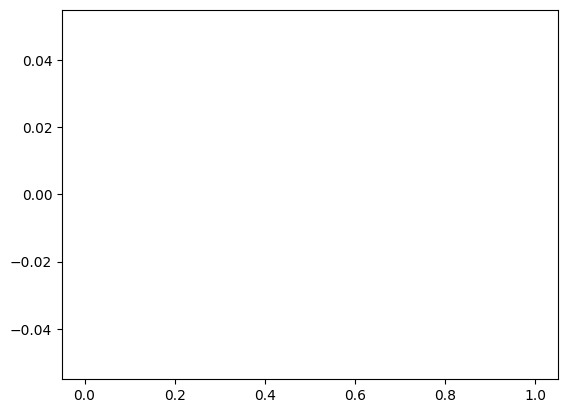

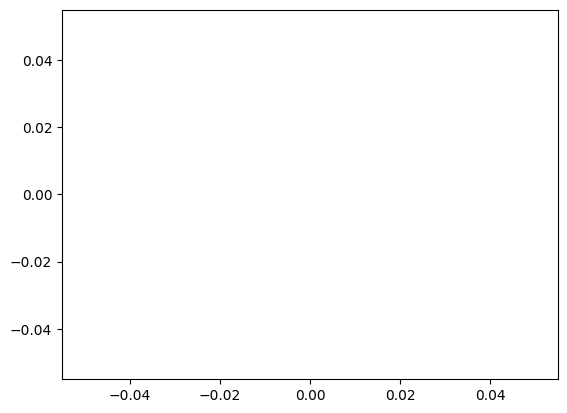

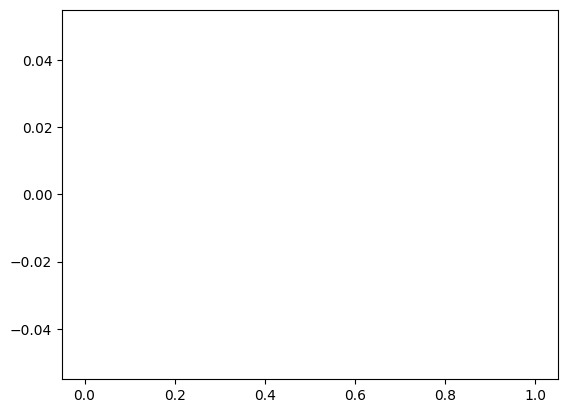

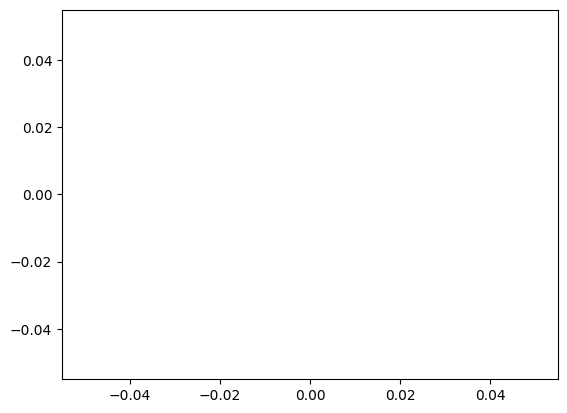

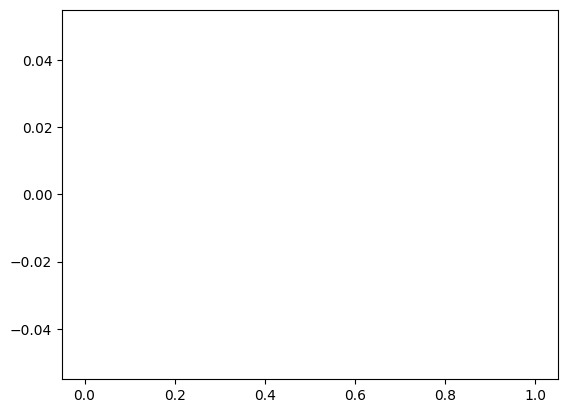

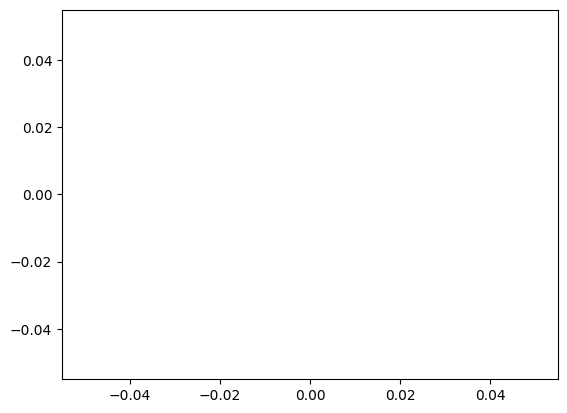

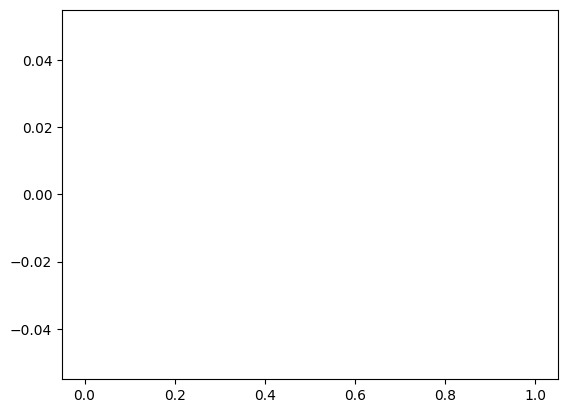

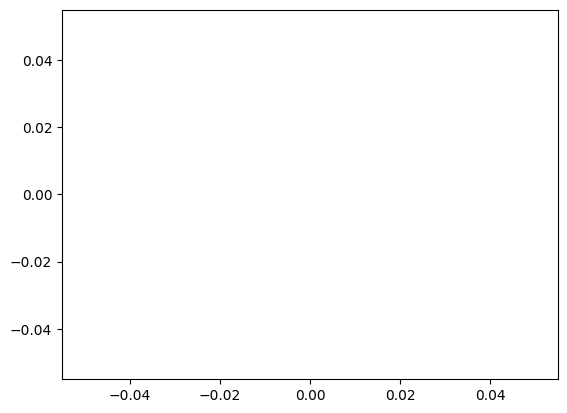

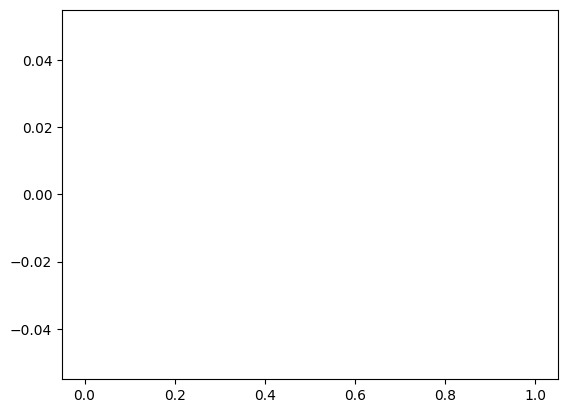

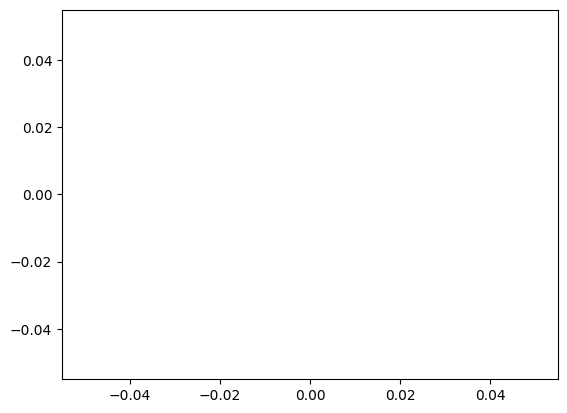

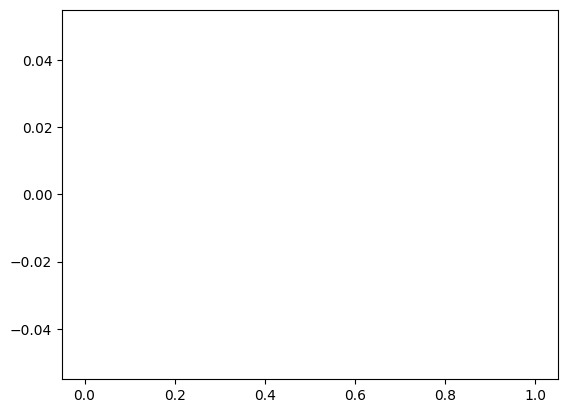

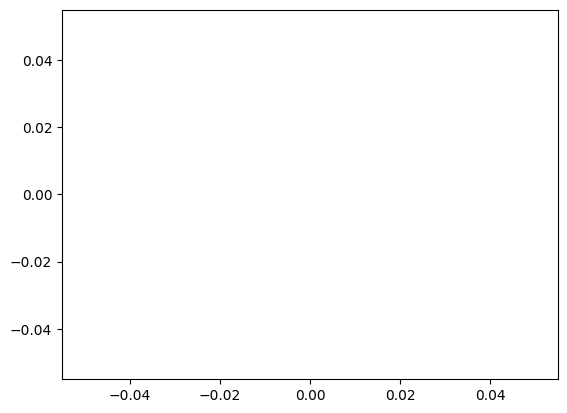

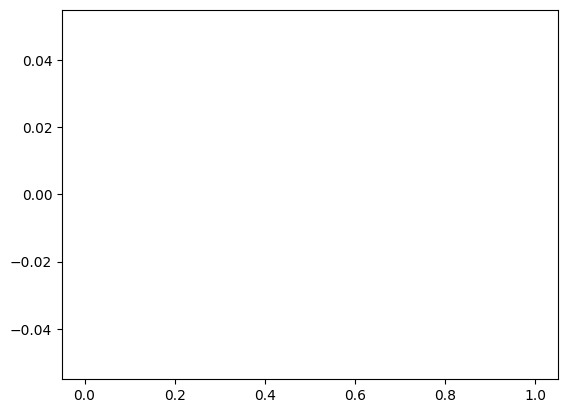

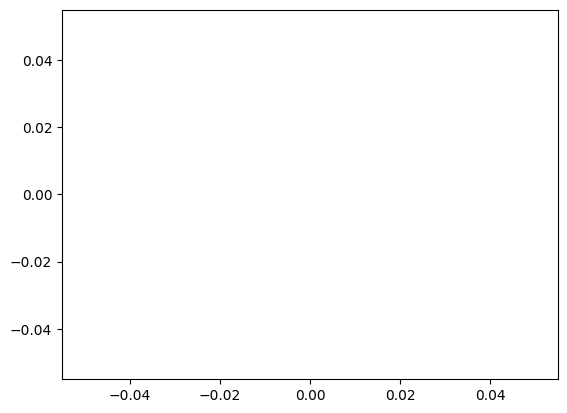

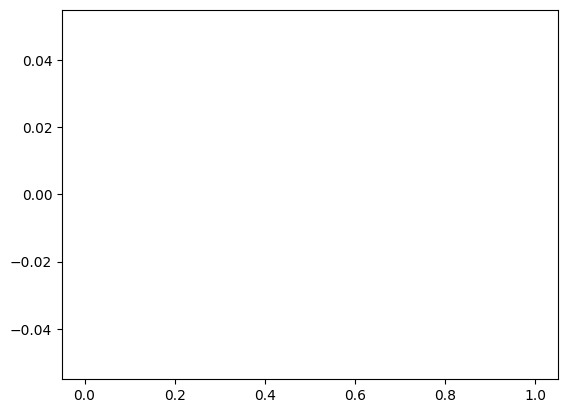

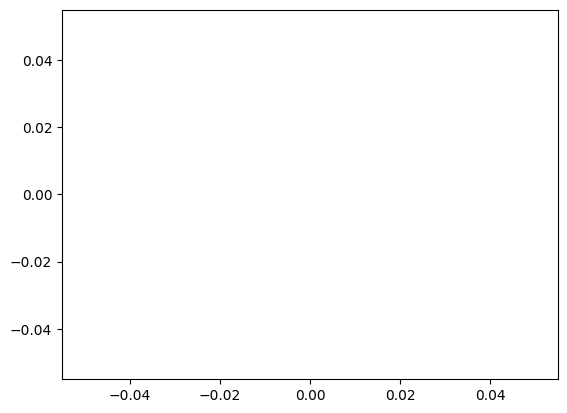

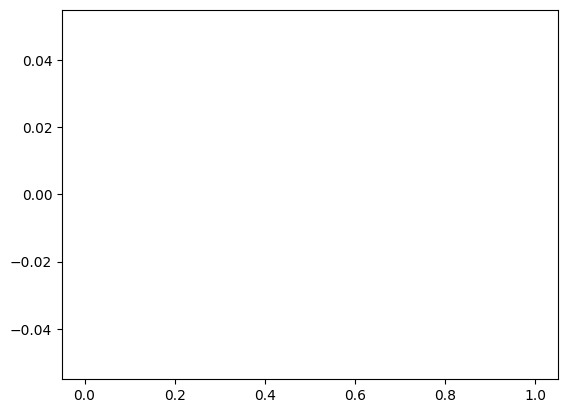

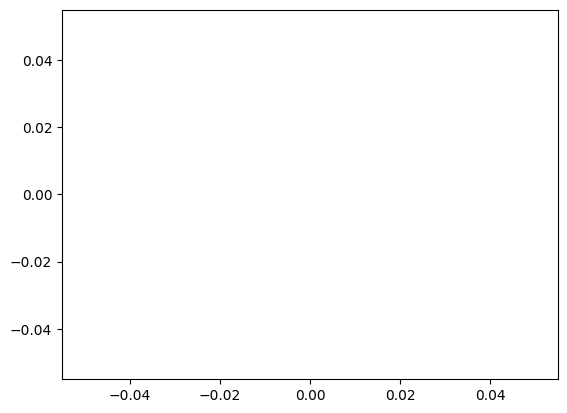

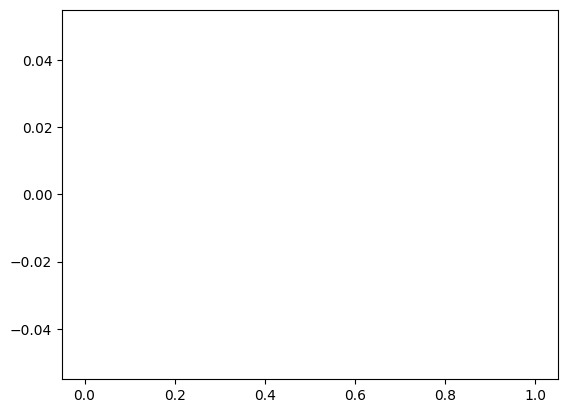

In [48]:
for k in scales_think_region_dist:
    plt.scatter(
        [x[0] for x in scales_think_region_dist[k] if x[1][0]>0],
        [x[1][0] for x in scales_think_region_dist[k] if x[1][0]>0],
        alpha=0.5,
    )
    plt.show()

    plt.hist(
        [x[0] for x in scales_think_region_dist[k] if x[1][0]<0],
    )
    plt.show()

In [49]:
scales_think_region_dist

{'What is the square root of 36?': [(-1.0, (-1, -1, 59)),
  (-0.8005540166204986, (-1, 301, -1)),
  (-0.6232686980609419, (-1, 301, -1)),
  (-0.46814404432132967, (-1, 301, -1)),
  (-0.33518005540166207, (-1, 301, -1)),
  (-0.22437673130193908, (-1, 301, -1)),
  (-0.1357340720221607, (74, -1, -1)),
  (-0.06925207756232689, (71, -1, -1)),
  (-0.02493074792243769, (60, -1, -1)),
  (-0.0027700831024930804, (60, -1, -1)),
  (0, (60, -1, -1)),
  (0.0027700831024930687, (60, -1, -1)),
  (0.02493074792243769, (60, -1, -1)),
  (0.06925207756232683, (96, -1, -1)),
  (0.13573407202216053, (59, -1, -1)),
  (0.22437673130193897, (59, -1, -1)),
  (0.33518005540166207, (49, -1, -1)),
  (0.4681440443213295, (51, -1, -1)),
  (0.6232686980609415, (-1, -1, 24)),
  (0.8005540166204984, (-1, 301, -1)),
  (1.0, (-1, 301, -1))],
 "What integer's square root is closest to 10.3?": [(-1.0, (-1, -1, 64)),
  (-0.8005540166204986, (-1, 301, -1)),
  (-0.6232686980609419, (-1, 301, -1)),
  (-0.46814404432132967, (-